# BackTest——简单测试
@author: Jerry
@contact: lvjy3.15@sem.tsinghua.edu.com
@file: demo.py
@time: 2016/5/19 0:09
* 选择每天可交易列表中的排名靠前的50只股票，等权重调仓，调仓频率为5天一次，股票池为所有A股，初始资金为100000000，手续费双边0.002，信息滞后期1
* 测试期 2013-01-01 到 2013-10-01 十个月

In [2]:
from backtest import BackTest
%matplotlib inline

######## Reading data ########
Get 177 obersevations from 20130104 to 20130930
########     Done     ########
-----------Performance Analysis-------------
Sharpe ratio : -0.175
Average year return : -0.013
Maximum draw down : -0.131
Annualized return volatility : 0.073


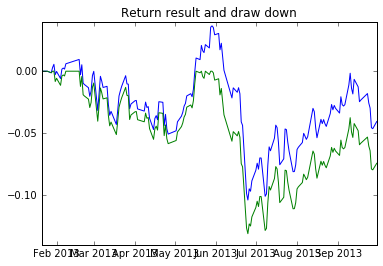

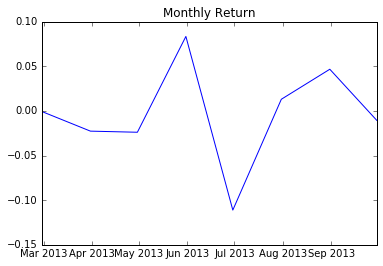

--------------Rsik Analysis----------------
Average PnL : -24109.8
Average cash ratio : 0.355
Average leverage : 0.645
Winning rate : 0.494
--------------------End--------------------


In [3]:
class Strategy(BackTest):
	def __init__(self,model_name, begin_time, end_time, begin_equity, fee,
	             path, universe,freq,length, lag):
		BackTest.__init__(self,model_name, begin_time, end_time, begin_equity, fee,
	             path, universe,freq,length, lag)

	def handle_data(self):
		'''
		The trade strategy part
		:return: none
		'''
		portfolio_value = self.broker.portfolio_value()  # account value
		cash = self.broker.get_cash()  # cash available
		universe = self.broker.get_universe()  # stock can be traded

		MA5 = self.strat.MA(5,'close')  # get MA5
		MA10 = self.strat.MA(10,'close') # get MA10
		# weight = self.broker.get_weight(universe[0])  # get last position weight
		# pos = self.broker.get_position(universe[0])  # get last position

		buy_list = universe[0:50]
		hold_list = [stock for stock in buy_list if stock in universe]
		# sell first
		for stock in universe:
			if stock not in hold_list:
				self.broker.order_to(stock, 0)

		# change the position
		change = {}
		d = len(hold_list)
		for stock in hold_list:
			weight = self.broker.get_weight(stock)
			change[stock] = 1/d-weight
		# make the orders
		for stock in sorted(change, key=change.get):
			self.broker.order_pct_to(stock, change[stock])

def main():
	bt = Strategy(model_name='demo',
	              begin_time="2013-01-01",
	              end_time="2013-10-01",
	              path='E:\\data',
	              universe = 'allA',
	              begin_equity=  100000000,
	              fee = 0.002,
	              freq =5,
				  length=10,
				  lag=1)
	perf, risk= bt.start() # collect the result for futher use

if __name__ == '__main__':
	main()